<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

An initial linear combination of inputs and added non-linearity form a layer in the Neural Networks.

There are 3 main types of layers in NN

### Input Layer: 
Input layer is what receives inputs. these inputs can be loaded from an  external source such as web service or csv file. Input layers takes in the inputs, performs the calculations via its neurons and then output is transmitted onto the subsequent layers. Sometimes it is also called visible layers because it is the only layer that our data intracts with directly.

The number of neurons in an input layer is dependent on the shape of your training data.
Traditionally,

    Number of Neurons = Number of Training data Features + 1

One additional node is to capture the bias term.

The neurons simply calculate the weighted sum of inputs and weights, add the bias and execute an activation function.

### Hidden Layer:
Hidden layers resides in-between inputs layers and output layers,where artificial neurons take in a set of weighted inputs and produce an output through an activation function.The hidden layers' job is to transform the inputs into something that the output layer can use.hidden layer in artificial neural networks a layer of neurons, whose output is connected to the inputs of other neurons and therefore is not visible as a network output.There could be zero or more hidden layers in a neural network.

### Output Layer:
The final layer is called the Output Layer.The output layer takes inputs from the  previous layer before it, performs the calculations via its neurons and then the output is computed. The purpose of the output layer is to output a vector of values that is in a format that is suitable for the type of problem that we're trying to address.

### Neuron:
Neural network is a set of neurons organized in layers. Each neuron is a mathematical operation that takes it’s input, multiplies it by it’s weights, subsequently, a bias (constant) is added to the weighted sum and then passes the weighted sum through the activation function to the other neurons.

### Weight:
In Neural network, some inputs are provided to an artificial neuron, and with each input a weight is associated.The weight shows the effectivenessof  a particular input(or importance of the feature). More the weight of input, more it will have impact on network.Weight increases the steepness of activation function. This means weight decide how fast the activation function will trigger whereas bias is used to delay the triggering of the activation function.

Bias is like the intercept added in a linear equation. It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Therefore Bias is a constant which helps the model in a way that it can fit best for the given data.
### Activation Function:
Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.A neural network without an activation function is essentially just a linear regression model.  The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. 
Activation functions (non-linearities) are needed so we can break
the linearity and represent more complicated relationships.Moreover, activation functions are required in order to stack layers.
Activation functions transform inputs into outputs of a different kind.
Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (“fired”) or not, based on whether each neuron’s input is relevant for the model’s prediction. 
For example- . Ourbrain is a kind of an ‘activation function’. It tells us whether it is cold
enough for us to put on a jacket.


### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?
Neural network is a set of neurons organized in layers. Each neuron is a mathematical operation that takes it’s input, multiplies it by it’s weights, subsequently, a bias (constant) is added to the weighted sum and then passes the weighted sum through the activation function to the other neurons.

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
##### Your Code Here #####
Y = df['y'].values
Y = df['y'].to_numpy().reshape(-1, 1)
Y.shape

(4, 1)

In [4]:
X = df.iloc[:, [0,1]].values
X.shape

(4, 2)

In [5]:
class Perceptron():

    def __init__(self, input_size=2, output_size=1, lr=0.01, niter=10):
        self.input_size = input_size
        self.output_size = output_size
        self.lr = lr
        self.niter = niter

        # Initialize weights once
        self.W = self.__init_weights(type_='custom')
        self.b = self.__init_bias()
        self.loss = []

    def __init_weights(self, type_='custom'):
        if type_ == 'uniform':
            W = np.random.random(self.input_size, self.output_size)
        elif type_ == 'normal':
            W = np.random.randn(self.input_size, self.output_size)
        elif type_ == 'custom':
            W = 2 * np.random.random((self.input_size, self.output_size)) - 1
        else:
            raise ValueError(
                'Parameter passed is wrong type, can only be "uniform", "normal", or "custom"')
        return W

    def __init_bias(self):
        return np.full((1, self.output_size), 0.1)

    def __sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def __sigmoid_derivative(self, X):
        sx = self.__sigmoid(X)
        return sx * (1-sx)
    def __feed_forward(self, X):
        """
        Computes Z values, which passing through sigmoid gives prediction probability
        """
        # Weighted sum of inputs / weights + bias
        Z = (X @ self.W) + self.b
        return Z

    def __backprop(self, dO, X):
        """
        Calculate weight adjustments
        """
        dW = np.dot(X.T, dO)
        db = np.sum(dO)
        return dW, db

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        try:
            y.shape[1]
        except IndexError:
            y = y.reshape(-1, 1)
        
        for i in range(self.niter):
            # Forward Prop
            Z = self.__feed_forward(X)
            y_hat = self.__sigmoid(Z)

            # Calculate cost/error MAE
            E = (y - y_hat)
            self.loss.append(np.sum(E.T))

            # Calculate adjustments/gradient
            dO = E * self.__sigmoid_derivative(y_hat)
            dW, db = self.__backprop(dO, X)

            # Update the Weights with new gradient
            self.W += self.lr * dW
            self.b += self.lr * db
            
    def predict_proba(self, X):
        """Return prediction probabilites"""
        return self.__sigmoid(self.__feed_forward(X))

    def predict(self, X, threshold=0.5):
        """Return class labels"""
        pred_probas = self.predict_proba(X)
        return (pred_probas > threshold).astype('int32')

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(1, len(self.loss)+1), np.array(self.loss),
                 marker='o', color='steelblue')
        plt.xlabel('Epochs')
        plt.ylabel('MAE Error')
        plt.show()

    def accuracy_score(self, y_true, y_pred):
        return (y_true == y_pred).sum()       

In [6]:
nand = Perceptron(input_size=2, output_size=1, lr=0.1, niter=1000)
nand.fit(X, Y)

In [8]:
print('Weights after training')
print(nand.W)


test_X = np.array

print(f'Predict X1: 0, X2: 0, y = {nand.predict(np.array([0, 0]))}')
print(f'Predict X1: 0, X2: 1, y = {nand.predict(np.array([0, 1]))}')
print(f'Predict X1: 1, X2: 0, y = {nand.predict(np.array([1, 0]))}')
print(f'Predict X1: 1, X2: 1, y = {nand.predict(np.array([1, 1]))}')

Weights after training
[[-2.92082557]
 [-2.91348555]]
Predict X1: 0, X2: 0, y = [[1]]
Predict X1: 0, X2: 1, y = [[1]]
Predict X1: 1, X2: 0, y = [[1]]
Predict X1: 1, X2: 1, y = [[0]]


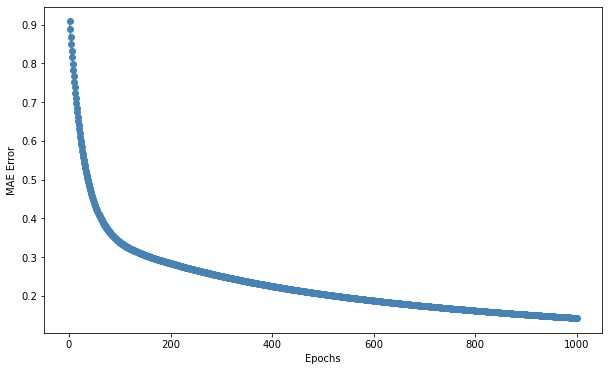

In [11]:
nand.plot_loss();

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [10]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [13]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes[feats]
print(X.shape)

(768, 8)


In [12]:
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return None
    
    def __sigmoid_derivative(self, x):
        return None

    def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

        # Randomly Initialize Weights
        weights = ...

        for i in range(self.niter):
            # Weighted sum of inputs / weights

            # Activate!

            # Cac error

            # Update the Weights


    def predict(self, X):
    """Return class label after unit step"""
        return None

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?